In [1]:
############
## Imports
############


import os
from google.colab import drive
drive.mount('/content/drive')
source_path = "/content/drive/MyDrive/embodied_counting/src/"

# Import: imports
directory_path = source_path

file_name = "imports.py"
PATH = directory_path + file_name
%run -i $PATH

# Import: environment
directory_path = source_path + "environment/"

file_name = "minimal_count_environment.py"
PATH = directory_path + file_name
%run -i $PATH
!python $PATH

file_name = "counting_tasks.py"
PATH = directory_path + file_name
%run -i $PATH
!python $PATH

file_name = "solving_algorithms.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: models
directory_path = source_path + "models/"

file_name = "experimental_simplest_LangConvLSTM_with_graph.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: train_and_test
directory_path = source_path + "train_and_test/"

file_name = "train_model_original.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "test_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "demonstrate_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "env_to_pytorch_interface.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: manage_results
directory_path = source_path + "manage_results/"

file_name = "run_schedules.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "save_and_plot.py"
PATH = directory_path + file_name
%run -i $PATH

CUDA_bool = False

Mounted at /content/drive
Import ...!
Libraries/Packages successfully imported...
Load Count-Environment..
Loading Automatic Solving Algorithms..?
Load Count-Environment..
Importing counting tasks...!
Load Count-Environment..
Loading Automatic Solving Algorithms..?
Load Count-Environment..
Importing counting tasks...!
Importing counting tasks...!
Loading Automatic Solving Algorithms..?
Load Count-Environment..
Importing counting tasks...!
Importing counting tasks...!
Loading Automatic Solving Algorithms..?
Loading model....???
Load training process....!!!
Load test process .... 
Import demonstrate-model ..
Load env-to-pytorch interface .... 
Load run, schedules ..! 
Load result managing..!


In [7]:
###############################
## TRAIN A MODEL FOR DEFINED TASK
################################

# Define tasks to be trained on parallely:
task_list = ["recite_n", "successor", "more"]

# Define max number of entities to be trained to count.
# If it is a list the numbers correspond to the list in the task_list respectively.
# ... so we can train tasks on different max-numbers and check for generalization
n_squares = 8
#n_squares = [9, 9, 5] 

# Define other parameters:
num_epochs = 1000

# Define NN-model to train on:
c = 2           # Input size
d = 5           # Hidden size
lr_dummy = 0.1
env = CountEnv(n_squares = 9, display = "game", save_epoch = True )

model = LangConvLSTMCell(c,d,env,lr_dummy)

# Train
train_model(task_list=task_list, n_squares_ = n_squares, num_epochs = num_epochs, model=model)

 
recite_n   / n = 1  :              0  /  20  test runs successful // 1-1:  0  /  20 Number order:  20  /  20
recite_n   / n = 2  :              0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


recite_n   / n = 3  :              0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
recite_n   / n = 4  :              0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
recite_n   / n = 5  :              0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
recite_n   / n = 6  :              0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
recite_n   / n = 7  :              0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
recite_n   / n = 8  :              0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
 
successor   / n = 1  :             0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
successor   / n = 2  :             0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
successor   / n = 3  :             0  /  20  test runs successful // 1-1:  0  /  20 Number order:  0  /  20
successor   / n = 4  :    

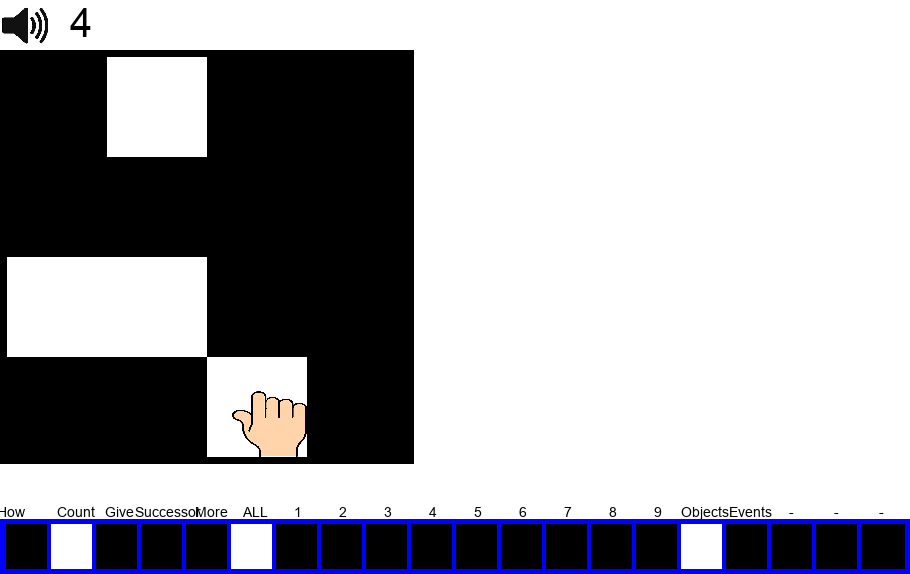

True


In [ ]:
#####################################
## AVERAGE AND SAVE MULTIPLE SCHEDULES FROM PRETRAINED
######################################

# Sequential Run 1: one run defines which tasks are going to be trained in parallel. This setup will then be run for n_replication times. We can run different setups in the run_list.
runny = run(["recite_n", "successor", "more"], initial_lr=0.005, n_squares=[9,6,6], num_epochs = 4000)
#runny = run(["count_all_events","give_n", "recite_n", "successor", "more"], initial_lr=0.005, n_squares=[9,9,9,6,6], num_epochs = 2000)
#runny = run(["count_all_events"], initial_lr=0.05, n_squares=9, num_epochs = 5000)
# Sequential Run 1
#runny2 = run(["count_all_events"], initial_lr=0.3, n_squares=9, num_epochs = 3000)
############################################################################################################################
run_list = []
run_list.append(runny)
#run_list.append(runny2)

#master_path = "/content/drive/My Drive/Embodied_counting/Results/count_all_events__give_n__recite_n__successor__more__1_TIMES__6252/multiple_tasks_1_to_9_21-02-19-14-02model-4289_/multiple_tasks_1_to_9_21-02-19-14-02model-4289_"

run_dfs = average_multiple_schedules(n_replications=1, run_list=run_list)